In [25]:
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

In [74]:
data=np.zeros((502,37326,7))
for i in range (0,502):
    for j in range (0, 9):
        subA=pd.read_csv('/home/andres/OpenFOAM/andres-7/run/alaPruebas/ala8Hz/fluid/data/magU{j}.{i}.csv'.format(j=j,i=i),skiprows=1)
        #print(subA)
        appA=subA.to_numpy()
        #print(appA)
        if j==0:
            A=subA.to_numpy()
        else:
            A=np.append(A,appA,axis=0)
        #print(A)
        if j==8:
            data[i] = A

[[ 1.09308538e-02  8.30001163e-01  0.00000000e+00 ... -5.00000000e-02
  -6.00000000e-02  8.00000000e-02]
 [ 1.09329315e-02  8.30011098e-01 -1.96891201e-05 ... -4.64588612e-02
  -5.63640926e-02  8.00000000e-02]
 [ 1.09392682e-02  8.30000000e-01  0.00000000e+00 ... -5.00000000e-02
  -5.63625000e-02  8.00000000e-02]
 ...
 [-2.22426472e-01  1.23606924e-06  1.74254781e-05 ...  3.09882044e-02
   2.99085645e-02  8.00000000e-02]
 [-2.22558171e-01  6.35533068e-07  1.74586016e-05 ...  3.09907693e-02
   2.99426151e-02  8.00000000e-02]
 [-2.22613438e-01  3.42146215e-07  1.74692709e-05 ...  3.09921207e-02
   2.99751809e-02  8.00000000e-02]]


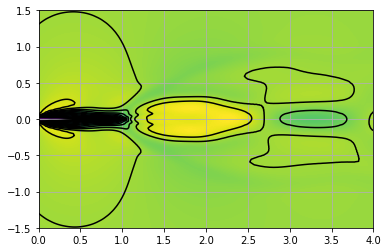

In [169]:
dataMean=np.mean(data,axis=0)
print(dataMean)
magU=np.sqrt(np.power(dataMean[:,1],2)+np.power(dataMean[:,2],2))
normU=magU/0.83
levels=np.linspace(normU.min(),normU.max(),1000)
levelsC=np.linspace(normU.min(),normU.max(),15)
#print(levels)
#print(magU)
fig, ax = plt.subplots()
ax.plot = plt.tricontourf((dataMean[:,4]-0.03)/0.035,(dataMean[:,5]-0.03)/0.035,normU,levels=levels)
ax.plot = plt.tricontour((dataMean[:,4]-0.03)/0.035,(dataMean[:,5]-0.03)/0.035,normU,levels=levelsC,colors='k')
ax.set(xlim=(0, 4), ylim=(-1.5, 1.5))
plt.grid()

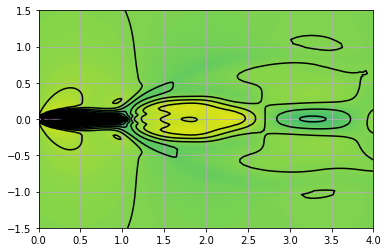

In [199]:
Ux=dataMean[:,1]
levelsX=np.linspace(Ux.min(),1.25,200)
levelsCx=np.linspace(Ux.min(),1.2,20)
fig, ax2 = plt.subplots()
ax2.plot = plt.tricontourf((dataMean[:,4]-0.03)/0.035,(dataMean[:,5]-0.03)/0.035,Ux/0.83,levels=levelsX,extend="max")
ax2.plot = plt.tricontour((dataMean[:,4]-0.03)/0.035,(dataMean[:,5]-0.03)/0.035,Ux/0.83,levels=levelsCx,colors='k')
ax2.set(xlim=(0, 4), ylim=(-1.5, 1.5))
plt.grid()